# Metrics sensitivity to alternative climate settings

The purpose of this notebook is to assess the sensitivity of the metrics values to various climate parameters.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Climate functions
from aerocm.metrics.aviation_climate_metrics_calculation import AviationClimateMetricsCalculation

In [2]:
# --- Set parameters ---

## Climate model
climate_model = "FaIR"
start_year = 1940

## Metrics
time_horizon = 100

## Species
species_profile = 'pulse'
profile_start_year = 2020
species_list = ["Contrails"]

# Species settings
species_settings_bickel = {"Contrails": {"ratio_erf_rf": 0.55, "efficacy_erf": 0.38}}
species_settings_teoh = {"Contrails": {"sensitivity_rf": 2.23e-12 * 0.557}}

In [3]:
# --- Calculate metrics ---

results_lee = AviationClimateMetricsCalculation(
    climate_model,
    start_year,
    time_horizon,
    species_profile,
    profile_start_year,
    species_list   
).run()

results_bickel = AviationClimateMetricsCalculation(
    climate_model,
    start_year,
    time_horizon,
    species_profile,
    profile_start_year,
    species_list,
    species_settings=species_settings_bickel
).run()

results_teoh = AviationClimateMetricsCalculation(
    climate_model,
    start_year,
    time_horizon,
    species_profile,
    profile_start_year,
    species_list,
    species_settings=species_settings_teoh
).run()

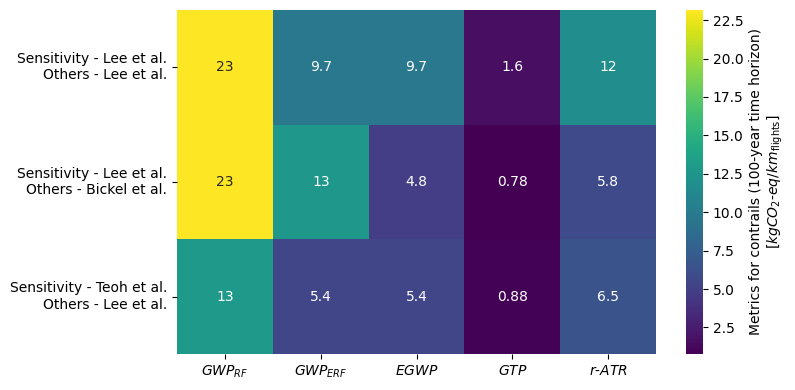

In [6]:
# -- Plot results ---

# Parameters
selected_horizon = 100
species = "Contrails"
selected_metrics = ["gwp_rf", "gwp_erf", "egwp_rf", "gtp", "ratr"]

# Collect data
data = np.zeros((3, len(selected_metrics)))

for k, results in enumerate([results_lee, results_bickel, results_teoh]):
    metrics = results[selected_horizon][species]
    data[k] = [metrics[m] for m in selected_metrics]

# Plot heatmap
metric_labels = [r"$GWP_{RF}$", r"$GWP_{ERF}$", r"$EGWP$", r"$GTP$", r"$r\text{-}ATR$"]
scenario_labels = [
    "Sensitivity - Lee et al.\nOthers - Lee et al.",
    "Sensitivity - Lee et al.\nOthers - Bickel et al.",
    "Sensitivity - Teoh et al.\nOthers - Lee et al."
]

plt.figure(figsize=(8, 4))
sns.heatmap(
    data,
    annot=True,
    cmap="viridis",
    cbar=True,
    xticklabels=metric_labels,
    yticklabels=scenario_labels,
    cbar_kws={
        "label": (
            "Metrics for contrails (100-year time horizon)\n"
            "[$kgCO_2\\text{-}eq/km_{\\text{flights}}$]"
        )
    }
)

# Save plot
plt.tight_layout()
plt.savefig("figures/alternative_settings.pdf")
plt.show()